## Hierarichal Clustering

In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
## loading iris dataset

data=datasets.load_iris()

In [3]:
df=pd.DataFrame(data.data)

In [4]:
df.head(3)

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [5]:
df.columns=data.feature_names

In [6]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
df.head(1)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2


In [9]:
x = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)']]
y=df['petal width (cm)']

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [11]:
y_train.shape

(120,)

In [12]:
y_test.shape

(30,)

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler=StandardScaler()

In [15]:
x_train_scaled=scaler.fit_transform(x_train)

In [16]:
x_test_scaled=scaler.transform(x_test)

In [17]:
from sklearn.decomposition import PCA

In [18]:
pca=PCA(n_components=2)  # 4 dimension converts into 2 dimension
pca


PCA(n_components=2)

In [19]:
pca_scaled=pca.fit_transform(x_train_scaled)

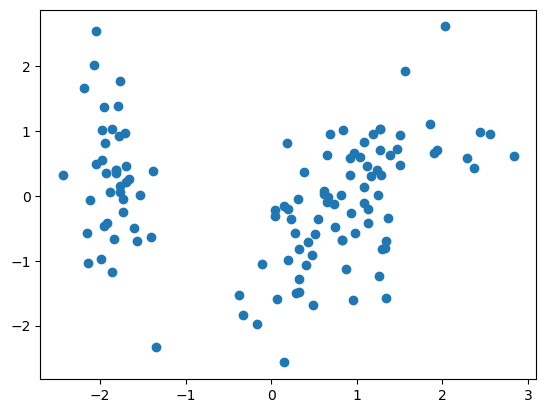

In [20]:
plt.scatter(pca_scaled[:,0],pca_scaled[:,1])

In [21]:
## Agglomeratic clustering
# construct the dendogram

Text(0, 0.5, 'Eucledian distance')

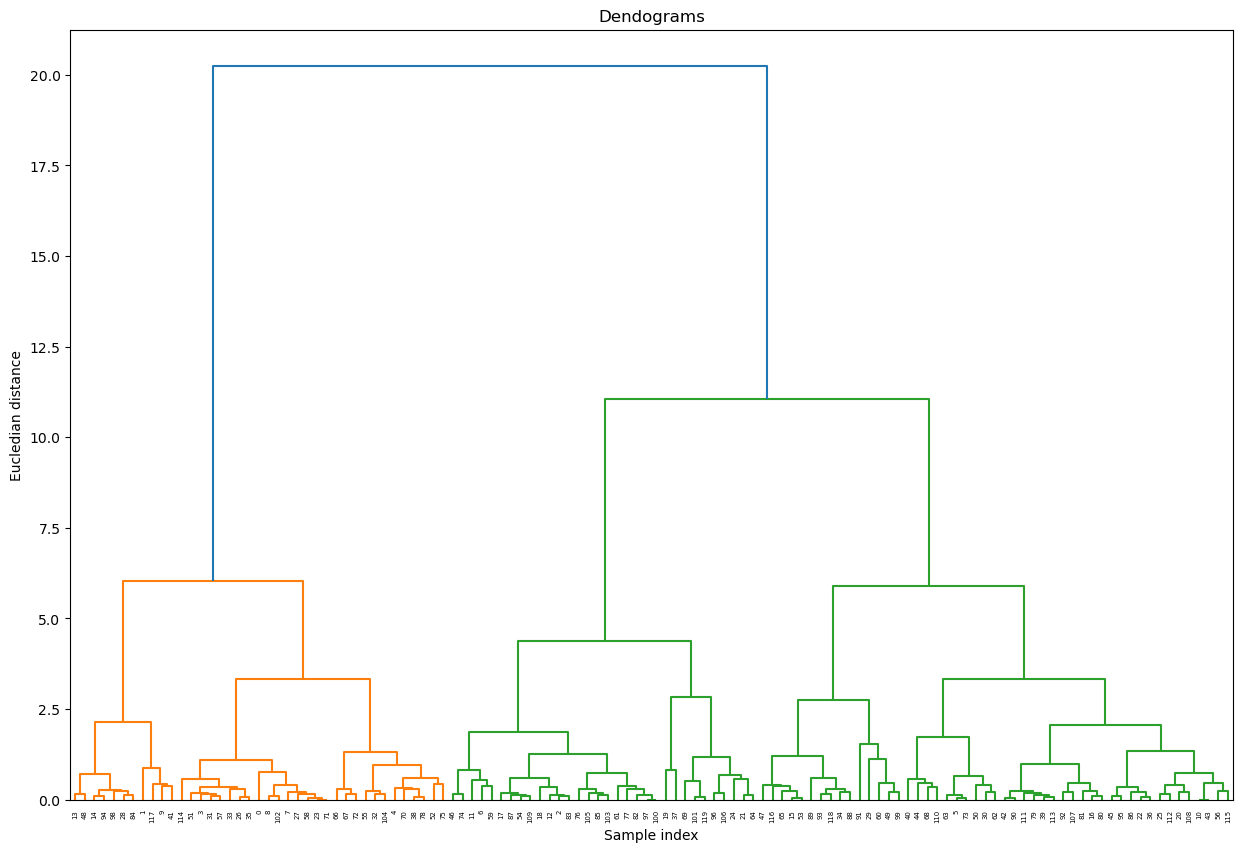

In [22]:
import scipy.cluster.hierarchy as sc
plt.figure(figsize=[15,10])
plt.title("Dendrograms")
 ## create dendogram
sc.dendrogram(sc.linkage(pca_scaled,method="ward"))
plt.title("Dendograms")
plt.xlabel("Sample index")
plt.ylabel("Eucledian distance")

In [23]:
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=2,affinity="euclidean",linkage="ward")
cluster.fit(pca_scaled)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean')

In [24]:
cluster.labels_

array([1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0])

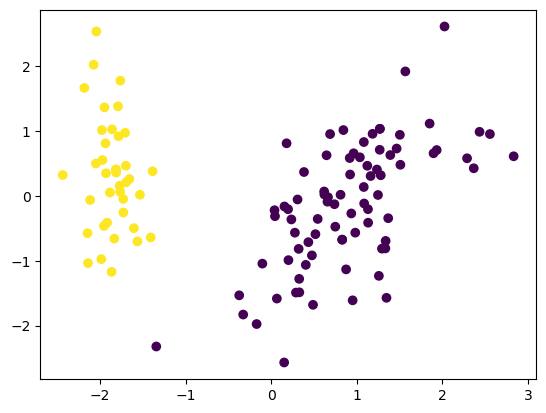

In [25]:
plt.scatter(pca_scaled[:,0],pca_scaled[:,1],c=cluster.labels_)

In [26]:
from sklearn.metrics import silhouette_score
x_train_scaled.shape

(120, 3)

In [34]:
silhouette_score_coeff=[]
for k in range(2,11):
    agglo=AgglomerativeClustering(n_clusters=k,affinity="euclidean",linkage="ward")
    agglo.fit(pca_scaled)
    score=silhouette_score(pca_scaled,agglo.labels_)
    silhouette_score_coeff.append(score)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be

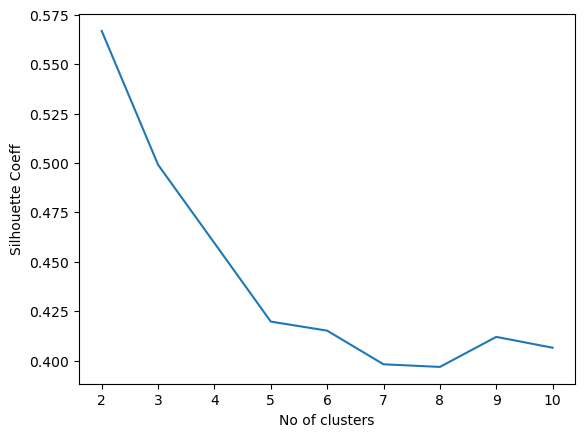

In [35]:
plt.plot(range(2,11),silhouette_score_coeff)
plt.xticks(range(2,11))
plt.xlabel("No of clusters")
plt.ylabel("Silhouette Coeff")
plt.show()

In [36]:
silhouette_score_coeff

[0.5669340184853635,
 0.4991752511128432,
 0.4595198156948319,
 0.4197502889963912,
 0.4151575810701446,
 0.3981298267496834,
 0.39679622458724195,
 0.41200787191130234,
 0.4065166645538639]